In [9]:
#Data Manipulation packages
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize 

#webscraping packages
from bs4 import BeautifulSoup as BS
import requests
import json
#import geocoder #Using the geocoder to find long and lat
#from geopy.geocoders import Nominatim

#Machine Learning Packages
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans # All packages related to Kmeans and the evaluation
from sklearn import metrics

#Visualization Packages
import matplotlib.pyplot as plt
import plotly.plotly as py #preferred package to create interactive plots and maps
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#declaring this. Much similar to %matplotlib inline.
init_notebook_mode(connected=True)


plotly.tools.set_credentials_file(username='kahang9567', api_key='1uZxivjwEtskQi9csqWJ')

In [12]:
!wget --quiet -O Geospatial_Coordinates.csv http://cocl.us/Geospatial_data

In [13]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

postal =requests.get(url)
html = postal.text

soup = BS(html, 'lxml')

In [14]:
soup_pret = soup.prettify()

table = soup.find('table')

In [15]:
Post = []
Borough = []
Neighborhood = []

for row in table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells) == 3:
        Post.append(cells[0].get_text())
        Borough.append(cells[1].get_text())
        Neighborhood.append(cells[2].get_text())

print(Post[:10])
print(Borough[:10])
print(Neighborhood[:10])

['M1A', 'M2A', 'M3A', 'M4A', 'M5A', 'M5A', 'M6A', 'M6A', 'M7A', 'M8A']
['Not assigned', 'Not assigned', 'North York', 'North York', 'Downtown Toronto', 'Downtown Toronto', 'North York', 'North York', "Queen's Park", 'Not assigned']
['Not assigned\n', 'Not assigned\n', 'Parkwoods\n', 'Victoria Village\n', 'Harbourfront\n', 'Regent Park\n', 'Lawrence Heights\n', 'Lawrence Manor\n', 'Not assigned\n', 'Not assigned\n']


In [16]:
neigh = []

for i in Neighborhood:
    index = i.find("\n")
    neigh.append(i[:index].rstrip())

print(neigh[:10])

['Not assigned', 'Not assigned', 'Parkwoods', 'Victoria Village', 'Harbourfront', 'Regent Park', 'Lawrence Heights', 'Lawrence Manor', 'Not assigned', 'Not assigned']


In [17]:
df = pd.DataFrame(Post, columns = ['Postcode'])
df['Borough'] = Borough
df['Neighborhood'] = neigh

In [18]:
df1 = df[df['Borough'] != 'Not assigned'].reset_index(drop = True)

df1 = df1.copy()

df1.loc[6, 'Neighborhood'] = "Queen's Park"

df1

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Queen's Park
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


In [19]:
df2 = pd.DataFrame(df1.groupby(['Postcode', 'Borough'])['Neighborhood'].unique())
df2.reset_index(inplace = True)


for i, k in df2['Neighborhood'].iteritems():
    l =list(k)
    t = ''
    for p, m in enumerate(l):
        t = t + str(l[p])+', '
    
    df2.loc[i,'Neighborhood'] = t[:-2]

In [20]:
geo_coords = pd.read_csv('Geospatial_Coordinates.csv')
df2 = pd.merge(df2, geo_coords, left_on = 'Postcode', right_on = 'Postal Code').drop('Postal Code', axis = 1)
df2

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


Looking at the map before clustering to get an idea as to how many clusters I should start with.

In [23]:

import json  # library to handle JSON files# libra 

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library


In [24]:
Toronto_address = 'Toronto, Ontario'
geoloc = Nominatim(user_agent = 'toronto_explorer')
location = geoloc.geocode(Toronto_address)
lati = location.latitude
long = location.longitude
#print(lat, long) 
# Retrieving the location address of Toronto

In [25]:
data = [
    go.Scattermapbox(
        lat= df2['Latitude'],
        lon= df2['Longitude'],
        mode='markers',
        text = 'NEIGHBORHOOD: '+ df2['Neighborhood'] + '<br> BOROUGH: ' + df2['Borough'],
        marker=dict(
            size=12,
            color = 'rgba(0,191,255, 0.7)'
        ),
        
    )
]

In [26]:
mapbox_access_token = 'pk.eyJ1Ijoia2FoYW5nOTU2NyIsImEiOiJjanJsaTY3OGYwOHJvNDRtdTdyMDl1NnFzIn0.Dm97KLFxbxQlYUXs8T_DKA'

layout = go.Layout(
    autosize=False,
    width = 1000,
    height = 1000,
    title = 'Neighborhoods of Toronto City',
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=lati,
            lon=long
        ),
        pitch=0,
        zoom=10
    ),
)

In [27]:
fig = dict(data=data, layout=layout)
try:
    py.iplot(fig, filename='Toronto Mapbox')
    print(iplot(fig))
except:
    print(iplot(fig))

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kahang9567/0 or inside your plot.ly account where it is named 'Toronto Mapbox'


None


# Venue Analysis

In [29]:
CLIENT_ID = "GTJTLPS4G10PU35MI0TTZGGOQFGFXPGRA2HEZCHWHYXELNWD"
CLIENT_SECRET = "25DF55G2PXNRSFTUORLBXD5GIO5VXEZ1QFSPGFPNE4NSBATD"
VERSION = "20180605"

In [30]:
bor_lat = df2.groupby('Borough')['Latitude'].mean()
bor_lng = df2.groupby('Borough')['Longitude'].mean()
borough_lat_long = pd.DataFrame(bor_lat)
borough_lat_long['longitude'] =  bor_lng

neigh_lat = df2.groupby('Neighborhood')['Latitude'].mean()
neigh_lng = df2.groupby('Neighborhood')['Longitude'].mean()
neigh_lat_long = pd.DataFrame(neigh_lat)
neigh_lat_long['longitude'] =  neigh_lng
neigh_lat_long.reset_index(inplace= True)

In [32]:
def venue_getter(Lat, Long, limit = 5,Neighborhoods = None ): 


    radius = 1500
    limit = limit
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,VERSION, lati, long,  radius, limit)
    Latitude = pd.DataFrame(Lat).reset_index(drop=True)
    Longitude = pd.DataFrame(Long).reset_index(drop=True)
    for i in range(len(Lat)):
        lat = round(Latitude.loc[i,['Latitude']].item(), 2)
        lon = round(Longitude.loc[i,'longitude'].item(), 2)
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,VERSION, lat, lon,  radius, limit)
        #print(url)
        Tor_result = requests.get(url).json()
        #print(Tor_result)
        try:
            venues = Tor_result['response']['venues']
        except:
            pass
        #print(i)
        
        if (Neighborhoods is not None):
            neighb = list(Neighborhoods)  
        else: 
            pass #print('None')
        for a in venues: 
            Neighborhood_name.append(neighb[i])
            venue_names.append(a['name'])
            lat_ven.append(a['location']['lat'])
            lng_ven.append(a['location']['lng'])
    
            if ('postalCode' in a['location'].keys()):
                postal_codes.append(a['location']['postalCode'])
            else: 
                postal_codes.append('nan')
            p = a['categories']
            if a['categories'] == []:
                category_name.append('nan')
            else:
                for l in p:
                    category_name.append(l['name'])

In [33]:
venue_names = [] 
lat_ven = []
lng_ven = []
postal_codes = []
category_name = []
Neighborhood_name = []

venue_getter(neigh_lat_long['Latitude'], neigh_lat_long['longitude'], Neighborhoods = neigh_lat_long['Neighborhood'])

venue_df = pd.DataFrame(venue_names, columns = ['Venue_Names'])
venue_df['Latitude']      = lat_ven
venue_df['Longitude']     = lng_ven
venue_df['Postal_Codes']  = postal_codes
venue_df['Category_Name'] = category_name
venue_df['Neighborhood']  = Neighborhood_name
#venu_postal_df = venue_df[venue_df['Postal_Codes'] != 'nan'].reset_index(drop = True)
venu_postal_df = venue_df.copy()

In [34]:
Neighborhoods = go.Scattermapbox(
        lat= df2['Latitude'],
        lon= df2['Longitude'],
        mode='markers',
        text = 'NEIGHBORHOOD: '+ df2['Neighborhood'] + '<br> BOROUGH: ' + df2['Borough'],
        marker=dict(
            size=15,
            color = 'rgba(0,191,255, 0.7)'
        ),
        
    )



Venues = go.Scattermapbox(
        lat = venu_postal_df['Latitude'],
        lon = venu_postal_df['Longitude'],
        mode = 'markers', 
        text = 'VENUE NAME: ' +venu_postal_df['Venue_Names'] + '<br> VENUE TYPE: ' + venu_postal_df['Category_Name']+ '<br> NEIGHBORHOOD: '+venu_postal_df['Neighborhood'],
        marker = dict(
            size = 10,
            color = 'rgba(255,0,0, 0.7)'
        ),
    
    )
    
    
    


layout = go.Layout(
    autosize=False,
    width = 1000,
    height = 1000,
    title = 'Neighborhoods and Venues of Toronto City',
    hovermode='closest',
    showlegend = False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=lati,
            lon=long
        ),
        pitch=0,
        zoom=10
    ),
    
)
data = [Neighborhoods, Venues]
#data = trace1
fig = dict(data=data, layout=layout)

try:
    py.iplot(fig, filename='Toronto Venues_Neighs')
    print(iplot(fig))
except:
    print(iplot(fig))

None


In [35]:
venue_cat = pd.get_dummies(venu_postal_df[['Category_Name']], prefix = "", prefix_sep = "")
venue_cat.drop('nan',axis = 1,inplace = True)

ven_onehot = venu_postal_df[['Neighborhood', 'Latitude', 'Longitude']].copy()
ven_onehot.rename({'Neighborhood': 'Neighborhoods'}, axis = 1, inplace = True)

col_list=list(ven_onehot.columns) + list(venue_cat.columns)
venue_onehot = pd.concat([ven_onehot,venue_cat], axis = 1)
ven_lat_long = venue_onehot[['Neighborhoods', 'Latitude', 'Longitude']].copy()
venue_onehot.drop([ 'Latitude', 'Longitude'], axis= 1, inplace = True)

venue1 = venue_onehot.groupby('Neighborhoods').sum()
venue2 = ven_lat_long.groupby('Neighborhoods').mean().reset_index()

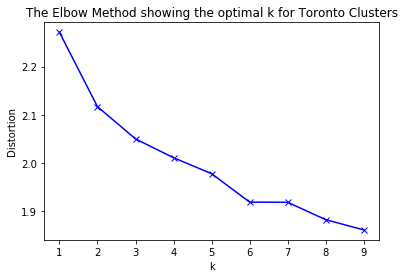

In [36]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 21).fit(venue1)
    kmeanModel.fit(venue1)
    distortions.append(sum(np.min(cdist(venue1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / venue1.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Toronto Clusters')
plt.savefig('Toronto Clusters.png')


plt.show()

In [37]:
n_cluster = int(input('Please input an integer for # of clusters based off of the elbow plot above: ')) # Create a for loop for the clusters. and base the clusters on the elbow plot return

tor_kmeans = KMeans(n_clusters=n_cluster, random_state = 25).fit(venue1)
lab = tor_kmeans.labels_
labs = pd.DataFrame(lab)


venue2['Cluster_Labels'] = labs

clusters = list()
for i in range(n_cluster):
    cluster = venue2[venue2['Cluster_Labels'] == i].reset_index(drop=True)
    clusters.append(cluster)  

#Cluster_Map = folium.Map(location = [lati, long], zoom_start = 11) 
#clusters = [clust1, clust2, clust3, clust4, clust5]
for c in clusters: 
    c['Cluster_Labels'] = c['Cluster_Labels'].astype('str')
colors = ['rgb(255,0,0)', 'rgb(255,255,0)', 'rgb(0,255,255)', 'rgb(255,165,0)', 'rgb(0,0,255)', 'rgb(255,0,255)', 'rgb(0,255,0)','rgb(210,105,30)', 'rgb(245,245,220)','rgb(240,230,140)']
data = []
for i,k in enumerate(clusters):
        Cluster_ = go.Scattermapbox(
        lat= clusters[i]['Latitude'],
        lon= clusters[i]['Longitude'],
        mode='markers',
        text = 'NEIGHBORHOOD: '+ clusters[i]['Neighborhoods'] + '<br> CLUSTER: ' + clusters[i]['Cluster_Labels'],
        marker=dict(
            size=15,
            color = colors[i],
            opacity = 0.85
        ),)
        
        data.append(Cluster_)
    


layout = go.Layout(
    autosize=False,
    width = 1000,
    height = 1000,
    title = 'Clusters of Neighborhoods by Venues in Toronto City',
    hovermode='closest',
    showlegend = False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=lati,
            lon=long
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
try:
    py.iplot(fig, filename='Clusters of Neighborhoods by Venues in Toronto City')  
    print(iplot(fig))
except:
    print(iplot(fig))

Please input an integer for # of clusters based off of the elbow plot above: 6


None


In [38]:
venue_names = [] 
lat_ven = []
lng_ven = []
postal_codes = []
category_name = []
Neighborhood_name = []

venue_getter(neigh_lat_long['Latitude'], neigh_lat_long['longitude'],limit = 20, Neighborhoods = neigh_lat_long['Neighborhood'])

venues = pd.DataFrame(Neighborhood_name, columns = ['Neighborhoods'])
venues['Category_Name'] = category_name

#venu_postal_df = venue_df[venue_df['Postal_Codes'] != 'nan'].reset_index(drop = True)
venues1 = venues[venues['Category_Name'] != 'nan']

dummies = pd.get_dummies(venues1[['Category_Name']], prefix="", prefix_sep = "")
venues2 = pd.concat([venues1, dummies], axis = 1).drop('Category_Name', axis = 1)

venues3 = venues2.groupby('Neighborhoods').sum()
venue_count = pd.DataFrame(venues3.sum(axis = 1), columns = ['Venue_Count']).reset_index()

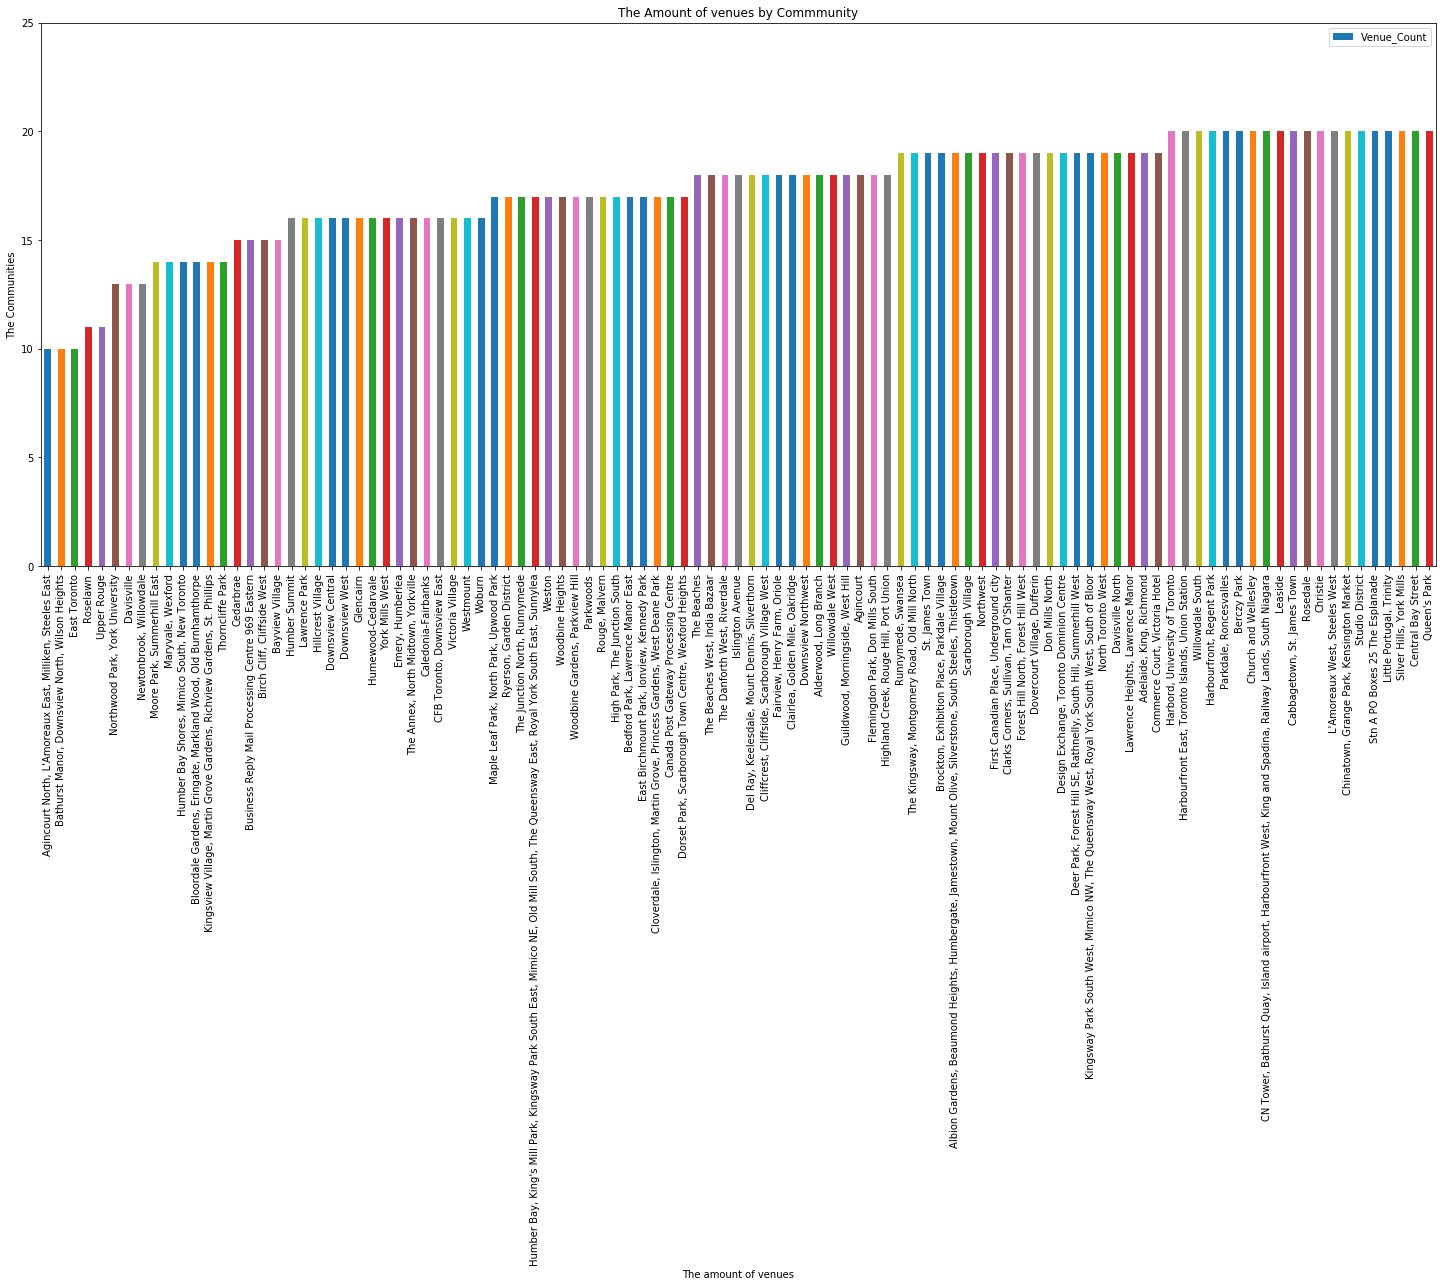

In [39]:
venue_count.sort_values(by = 'Venue_Count', inplace = True)
_ = venue_count.plot.bar('Neighborhoods', 'Venue_Count', figsize = (25,10))
_ = plt.ylim(0,25,2)
_ = plt.title('The Amount of venues by Commmunity')
_ = plt.xlabel('The amount of venues')
_ = plt.ylabel('The Communities')


plt.show()


In [40]:
loc_list = []
for i, k in venues['Category_Name'].items():
    if ('Restaurant' in k):
        #print(i)
        loc_list.append(i)
    else:
        pass
venues_rest = venues.iloc[loc_list, :].reset_index(drop = True)
rests=pd.get_dummies(venues_rest[['Category_Name']], prefix = '', prefix_sep = '')
restaurant_venues=pd.concat([venues_rest, rests], axis = 1).drop('Category_Name', axis = 1)
rest_ven = restaurant_venues.groupby('Neighborhoods').sum()
venue_restaurants = pd.DataFrame(rest_ven.sum(axis = 1), columns = ['Counts of Restaurants']).reset_index()

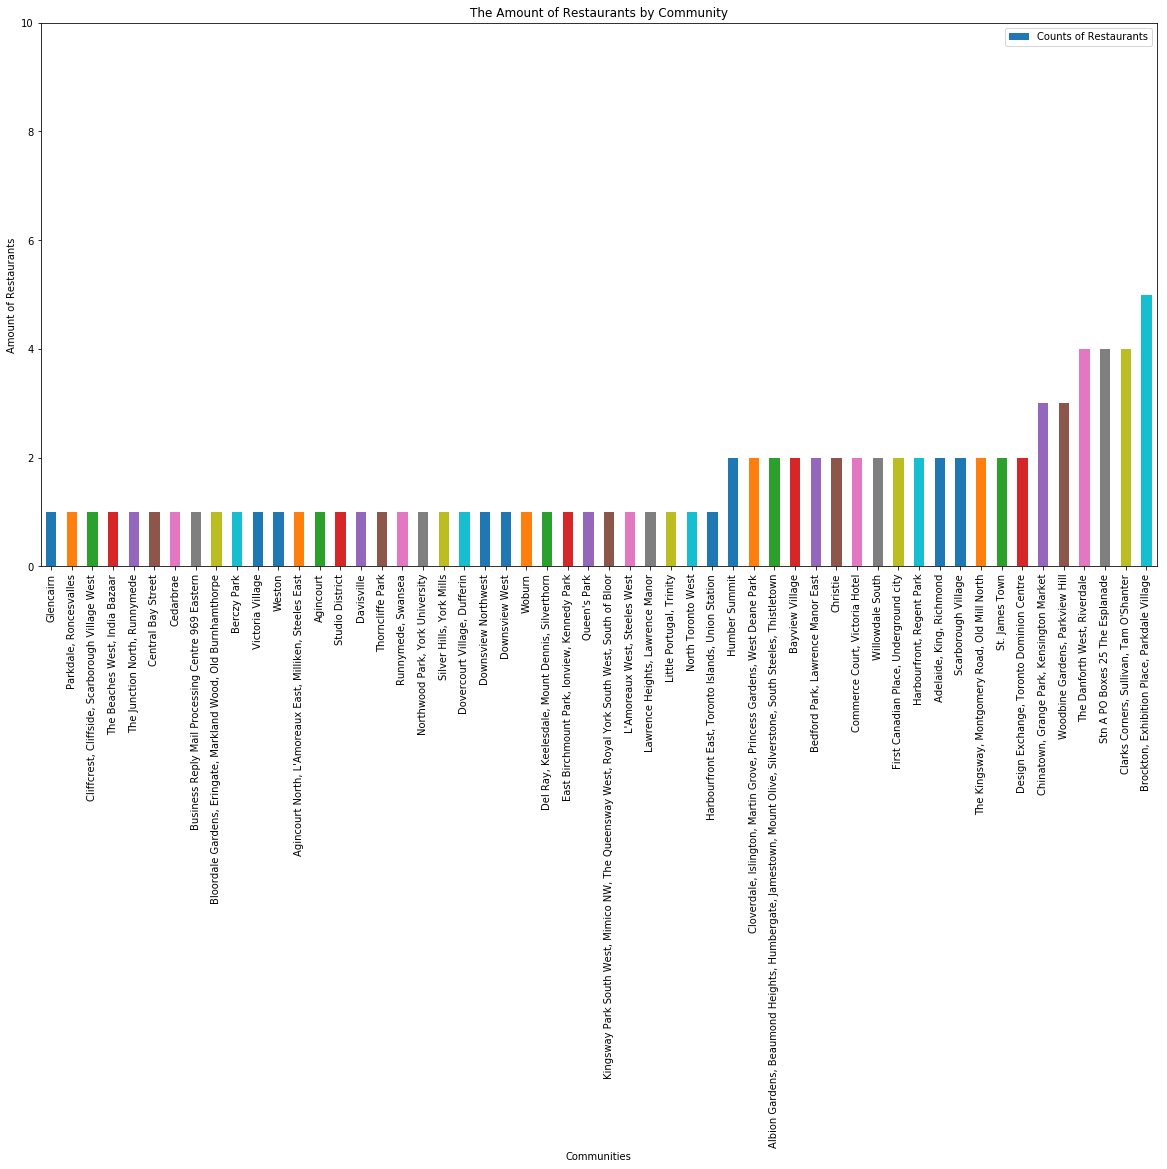

In [42]:
venue_restaurants.sort_values(by = 'Counts of Restaurants', inplace = True)
_= venue_restaurants.plot.bar('Neighborhoods', 'Counts of Restaurants', figsize = (20,10))
_= plt.ylim(0,10,2)
_= plt.ylabel('Amount of Restaurants')
_= plt.xlabel('Communities')
_= plt.title('The Amount of Restaurants by Community')  



plt.show()